<a href="https://colab.research.google.com/github/muditagarg/RNN/blob/main/Time_Series_Basics_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import basic Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

##For Timeseries and RNN

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [ ]:
!pip install

In [4]:
#import keras:TimeSeriesGenerator
#This class produces time series batches used on training and testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#import keras:minmaxscaler
from sklearn.preprocessing import MinMaxScaler #for normalising the data (scale)

##Generate Data

In [5]:
#create a simple sine wave using Numpy
x= np.linspace(0,64,1024) #ranging between (including) 0 and 64, generating 1024 data points
y= np.sin(x) #y are sin values of x

In [6]:
x # range of x goes from 0 to 64

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [7]:
y #range of sin value is between -1 and 1

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

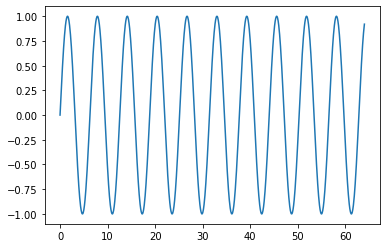

In [8]:
plt.plot(x,y)

In [9]:
#load data into pandas dataframe 
#Index: x; Data: y; Column Label: Sine
df= pd.DataFrame(data=y, index=x, columns=['Sine'])

In [10]:
df.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [11]:
len(df)

1024

###Split data into testing and training

In [13]:
#set percentage of data used for training
test_percent = 0.2

In [14]:
#Number of data points reserved for testing the model
#20% of the original dataset
len(df)*test_percent

204.8

In [15]:
#need to find the length(number of data points) of the testing dataset.
#it has been found (above) that around 205 datapoints are used for testing
test_length = np.round(len(df)*test_percent)

In [16]:
test_length

205.0

In [19]:
#the testing data set starts at this index
#index starting with 0
test_start_index = int(len(df) - test_length) #take length of original dataset - test data

In [20]:
test_start_index #starting of test data index is 819 so its 819 to 1023

819

In [23]:
#create separate training/ testing datasets
#training dataset: all index starting from start to test_start_index
data_train = df.iloc[: test_start_index :]
#testing dataset: all index from test_start_index to the end of df
data_test = df.iloc[test_start_index :]

In [24]:
data_train.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [25]:
data_test.head(5)

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


##Normalise the data (scale it into the range [0,1])

In [29]:
#create a minmaxscaler to normalise the data
scaler = MinMaxScaler()

In [30]:
#only scale the training data and not scale testing data
#train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [31]:
#normalize the training dataset
normalized_train = scaler.transform(data_train)
#normalize the testing dataset
normalized_test = scaler.transform(data_test)

##Create Timeseries generator instance

In [32]:
#timeseriesgenerator: generate time series batches for training/testing
#set the length of the input sequence I.E. the number of time series steps that are used to predict the future one
# use 50 historical data points to predict the next one
length = 50

#batch_size : number of time series samples in each batch
#one sample: each sample is a time series input sequence
#only one sample in each batch
batch_size = 1

#create a TimeSeriesGenerator for training : train_tsGenerator
#this time series generator produces time series batches used to train the model
#timeseriesgenerator(input dataset, output dataset, length, batch_size) #input = output since same dataset
train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length = length, batch_size = batch_size)


In [34]:
#what does first batch look like?
X,y = train_tsGenerator50[0] #since its array

In [35]:
#Print X.flatten()
X.flatten() #Flattened into 1-d array so that easily can see it

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [36]:
#Print y : what does x predict?
y

array([[0.50676759]])

##Build, Train and Test Model

###Build Simple RNN Model

In [38]:
#data set: only one column/attribute: Since Values of index x
#features : how many features used to train the model : only one
n_features = 1

#define model
model = Sequential()

#add a simple RNN layer: Using simplernn cells
#this layer has 100 neurons: one neuron for each input data point
#time series steps of the input sequence : 50
#input shape 2d: #time series steps x #features
model.add(SimpleRNN(100, input_shape = (length, n_features)))

#Add a FC layer for the final prediction
#only one neuro of the Dense/Fully connected layer
#output : Predict the next data point of the input sequence : only one value
model.add(Dense(1))

##Compile Model

In [39]:
#compile the model 
#loss function: mse( mean squared errors) ; why MSE? data is real values/continous : A regression problem
#optimizer : Adam
model.compile (optimizer='adam', loss = 'mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


##Train (Fit) Model

In [40]:
#fit the model
#use fit_generator(), Not fit()
#epochs : one time trained the whole batch, here its 5 this means we will train the whole dataset into different batches 5 times
model.fit_generator(train_tsGenerator50, epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
769/769 [==============================] - 15s 17ms/step - loss: 0.0052
Epoch 2/5
769/769 [==============================] - 12s 16ms/step - loss: 4.0007e-04
Epoch 3/5
769/769 [==============================] - 12s 16ms/step - loss: 2.9440e-04
Epoch 4/5
769/769 [==============================] - 12s 16ms/step - loss: 2.3135e-04
Epoch 5/5
769/769 [==============================] - 8s 11ms/step - loss: 5.6238e-05


##Visualise Model's Performance after Training

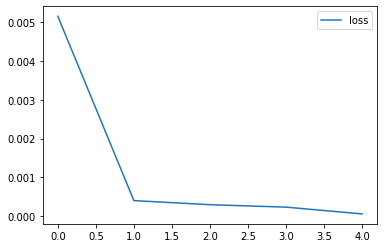

In [41]:
#load the loss data (model.history.history) into data frame
df_model_loss = pd.DataFrame(model.history.history)

#visualise the loss data using DataFrame.plot()
df_model_loss.plot()

#In the first epoch the loss dropped significantly

##Evaluate the Model on test data

###A sneak peak into the test data

In [42]:
#number of time steps of the input time series
length

50

In [43]:
#take a sneak peak into the 1st time serie batch (50 data points)
#array[-length:]: A sequeence of [50th to the last...last]
first_eval_batch = normalized_train[-length :]
first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [44]:
#important notes: first_eval_batch: Currently its a 2d array 50x1
#it's neccesary to reshape it into 3d : 1x50 x 1 : samples in a batch, timeseries steps, features

In [45]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)
first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [46]:
first_eval_batch.shape

(1, 50, 1)

##Evaluate Model

In [47]:
#all the code for the evaluation

#declare a list to store all the predictions
#similar to: test_predictions = list();
test_predictions = []

#get the first time series batch for testing
#the 1st batch: the 1st time series input sequence
# = the last 50 data points of the train dataset
first_eval_batch = normalized_train[-length:]

#reshape the batch into 3d array: #samples/batch x length x features
current_batch = first_eval_batch.reshape((1, length, n_features))

#run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):

  #get the value of the first element: the prediction
  current_pred = model.predict(current_batch)[0]

  #store predictions into the list of predictions
  test_predictions.append(current_pred)

  #generate a new batch to prepare for the next iteration of testing
  # drop the first data point of the current input sequence
  #append the newly predicted value to the tail of the input sequence
  #maintain the number of time series steps: 50
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


In [48]:
#convert the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.82052807],
       [ 0.85248999],
       [ 0.88021117],
       [ 0.903748  ],
       [ 0.9220983 ],
       [ 0.93647023],
       [ 0.94796495],
       [ 0.9541737 ],
       [ 0.95539154],
       [ 0.95286205],
       [ 0.94690196],
       [ 0.93657025],
       [ 0.92157986],
       [ 0.90347036],
       [ 0.88174372],
       [ 0.85634401],
       [ 0.8268658 ],
       [ 0.79442288],
       [ 0.75935879],
       [ 0.72088425],
       [ 0.67965957],
       [ 0.63562668],
       [ 0.58949369],
       [ 0.54084945],
       [ 0.48992176],
       [ 0.43683305],
       [ 0.3823806 ],
       [ 0.32617697],
       [ 0.26845056],
       [ 0.20933012],
       [ 0.14937785],
       [ 0.08863951],
       [ 0.02724505],
       [-0.03480405],
       [-0.09662314],
       [-0.15832027],
       [-0.21972636],
       [-0.28064452],
       [-0.34039665],
       [-0.39883872],
       [-0.45582842],
       [-0.51122286],
       [-0.56431842],
       [-0.61476603],
       [-0.6628119 ],
       [-0

In [49]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [50]:
#copy the true values of predictions into the dataframe of original dataset
#add it into new column
data_test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#updated data_test
data_test

,Sine,Predictions
51.237537,0.826045,0.820528
51.300098,0.859666,0.852490
51.362659,0.889923,0.880211
51.425220,0.916698,0.903748
51.487781,0.939887,0.922098
...,...,...
63.749756,0.794329,0.741139
63.812317,0.830756,0.793187
63.874878,0.863931,0.841088
63.937439,0.893727,0.884241


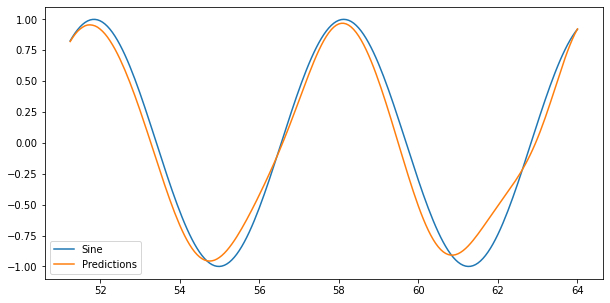

In [53]:
#Visualise the data of the updated test data
#compute the preedicted sine wave against the original sine wave
data_test.plot(figsize=(10,5))